## Practica 6: Retropropagacion

Implementar el algoritmo de retropropagacion para aproximar la funcion continua $f(p) = 1 + sin(\frac{\pi}{4}p)$

In [180]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
class NNetwork():
    
    def __init__(self, inputs, layers):
        self.inputs = inputs     # numero de entradas
        self.layers = layers     # numero de capas
        self.W = [0]*layers      # lista de matrices de pesos
        self.b = [0]*layers      # lista de vectores bias
        self.p = [0]*inputs      # lista de entradas
        self.n = [0]*layers      # lista de las sumas
        self.a = [0]*(layers+1)  # lista de salidas
        self.f = []              # funciones de activacion
        self.s = [0]*layers      # sensibilidades de la red 
        self.e = []              # lista de errores 
        
    def feedForward(self):
        ''' calcula las salidas en cada una de las capas '''
        # a0 = p
        self.a[0] = np.array(self.p)                                        
        for i in range(self.layers):
            # producto matriz-escalar
            if self.a[i].size == 1:
                n = self.W[i]*self.a[i] + self.b[i]
            # producto matriz-vector
            else:
                n = np.matmul(self.W[i], self.a[i]) + self.b[i]
            # an+1 = fn(Wnan+bn) 
            a = self.f[i](n)                                       
            self.n[i] = np.array(n)
            self.a[i+1] = np.array(a)
    
    def error(self, t, a):
        ''' calcula el error '''
        self.e = t-a
    
    def backpropagation(self):
        ''' realiza la retropropagacion '''
        # sensibilidad capa 2
        s2 = -2*1*self.e[0]
        dF = []
        # construir la matriz Jacobiana
        #for i in range(self.layers):
        for i in range(len(self.b[0])):
            dF.append((1-self.a[1][i])*self.a[1][i])
        dF = np.diag(dF)
        # sensibilidad capa 1
        s1 = np.matmul(dF, self.W[1]) * s2
        
        self.s[0] = s1
        self.s[1] = s2
        
    def updateWnB(self, alpha):
        ''' actualizar los pesos y los bias de cada capa'''
        for i in range(self.layers):
            self.W[i] = self.W[i] - alpha*self.s[i]*self.a[i]
            self.b[i] = self.b[i] - alpha*self.s[i]
    
    def learn(self, t, p, alpha, epochs):
        ''' entrenamiento de la red neuronal'''
        for k in range(epochs):
            if k == 0:
                self.p = 1
            else:
                self.p = p[np.random.randint(0, len(p))]
            self.feedForward()
            self.error(t(self.p), self.a[2])
            self.backpropagation()
            self.updateWnB(alpha)
            
            if k == 0:
                print('a0 = ', self.a[0])
                print('a1 = ', self.a[1])
                print('a2 = ', self.a[2])
                print('error = ', self.e[0])
                print('Pesos:')
                print(self.W)
                print('Bias:')
                print(self.b)
            
    def predict(self, p):
        y = []
        for x in p:
            n1 = self.W[0]*x + self.b[0]
            a1 = self.f[0](n1)
            a2 = np.matmul(self.W[1], a1) + self.b[1]
            y.append(a2)
        return y

In [182]:
# Creacion de la red neuronal con 1 entrada y 2 capas
nn = NNetwork(1, 2)

In [183]:
# Inicializacion de los parametros de la red
nn.W = [[-0.27, -0.41], [0.09, -0.17]]                      # Matriz de pesos inicial
nn.b = [[-0.48, -0.13], [0.48]]                               # Vector de bias inicial
nn.p = np.array([1])                                        # Valor de p inicial
nn.f = [lambda x: 1/(1+np.power(np.e, -x)), lambda x: x]    # Funciones de activacion

p = np.arange(-2,2.2, 0.2)                                  # Vector p con las 21 muestras

t = lambda x: 1 + np.sin(np.pi/4*x)                         # Funcion objetivo a aproximar

np.vectorize(nn.f)                                          # Vectorizacion de las funciones 
np.vectorize(t)

In [184]:
# Entrenamiento de la red neuronal
# Se imprimen los resultados de la primera iteracion
# para verificar que son como los obtenidos en clase
nn.learn(t, p, 0.1, 1000)

a0 =  1
a1 =  [0.3208213  0.36818758]
a2 =  [0.44628203]
error =  1.2608247530971957
Pesos:
[array([-0.26505491, -0.4199722 ]), array([ 0.17089989, -0.077156  ])]
Bias:
[array([-0.47505491, -0.1399722 ]), array([0.73216495])]


In [185]:
print('Vector de pesos capa 1:\n')
for w in nn.W[0]:
    print("%.4f" % w)
    
print('\nVector de pesos capa 2:\n')
for w in nn.W[1]:
    print("%.4f" % w)
    
print('\nVector bias capa 1:\n')
print(nn.b[0])
print('\nVector bias capa 2:\n')
print(nn.b[1])

Vector de pesos capa 1:

0.4768
-1.5922

Vector de pesos capa 2:

0.5983
-1.9429

Vector bias capa 1:

[-0.47036537 -0.04135425]

Vector bias capa 2:

[1.71658717]


In [186]:
# Predecir los valores de salida para cada p
y = nn.predict(p)

In [187]:
# Vectores de salida y entrada
y = [x[0] for x in y]
x = [n for n in p]

In [188]:
# Calcular los valores reales
y_real = [t(n) for n in x]

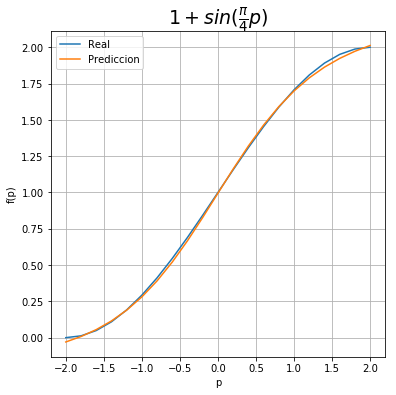

In [189]:
plt.figure(figsize=(6, 6))
plt.plot(x, y_real)
plt.plot(x, y)
plt.title(r"$ 1 + sin(\frac{\pi}{4}p) $",fontsize=19)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend(['Real','Prediccion'])
plt.grid(True)
plt.show()